In [51]:
# Imports 

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get and Filter data


In [3]:
def get_data(url):
    df = pd.read_csv(url, low_memory=False)
    print("data.shape : ", df.shape)
    return df
  
#get_data form url 
url = 'https://files.data.gouv.fr/geo-dvf/latest/csv/2020/full.csv.gz'
df = get_data(url)
# make copies
whole_data = df.copy()

def drop_rows_with_nan_in_column(df, col_name): #df : dataframe
    selected_rows = df[df[col_name].notna()]
    return selected_rows

data_clean = drop_rows_with_nan_in_column(df = whole_data, col_name= 'valeur_fonciere')
print("data_clean", data_clean.shape, "whole_data", whole_data.shape)


def filtered_data(df, col_mutation, col_local_type):
  
  modif_df = df[
                (df[col_mutation] == "Vente") & \
                 (   \
                  (df[col_local_type] == "Maison") | 
                   (df[col_local_type] == "Appartement") | 
                  (df[col_local_type] == "Dépendance")
                 )
                 ] 

    return modif_df                                
 
data = filtered_data(df = data_clean, 
                           col_mutation = 'nature_mutation',
                           col_local_type = 'type_local')                          

print("data.shape (whole)", whole_data.shape) # whole data
print("data_clean.shape", data_clean.shape) # NaN 'valeur_fonciere' out

print("data.shape (industrial out, NaN local type out, and only 'vente'mutation ", data.shape)


#whole_data : indutrial local type included
#data : indutrial local type out & (nature_mutation = 'vente)

data.shape :  (2459560, 40)
data_clean (2427808, 40) whole_data (2459560, 40)
data.shape (whole) (2459560, 40)
data_clean.shape (2427808, 40)
data.shape (industrial out, NaN local type out, and only 'vente'mutation  (1203720, 40)


In [4]:
data.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

## Column : surface_terrain

In [5]:
data['valeur_fonciere'].unique()

array([  72000.,  180300.,   54800., ..., 2025150.,  141293., 1937500.])

In [6]:
data['valeur_fonciere'].value_counts()

150000.0    12253
120000.0    11176
100000.0    10689
130000.0    10315
160000.0    10048
            ...  
151790.0        1
312710.0        1
133060.0        1
199030.0        1
49720.0         1
Name: valeur_fonciere, Length: 64933, dtype: int64

###Missing values

In [7]:
data['valeur_fonciere'].isnull().sum()

0

# Select rows with NaN in 'valeur_fonciere'

Check if there are NaN in column 'surface_terrain'

In [53]:
def select_rows_with_nan_in_list_columns(df, col_name): #df : dataframe
    if len(col_name) == 1 :
        selected_rows = df[
                     df[col_name[0]].isnull() 
                     ]
    elif len(col_name) > 1:
        selected_rows = df[
                     df[col_name[0]].isnull() & \
                     df[col_name[1]].isnull() 
                     ]
    return selected_rows


df_test = select_rows_with_nan_in_list_columns(df = data,
                                         col_name= ['valeur_fonciere'])
df_test.shape


(0, 40)

In [54]:
len(data) - len(df_test) 

1203720

In [12]:
mask_columns = ['id_mutation', 'date_mutation', 
                'numero_disposition', 'nature_mutation', 
       'surface_terrain', 'surface_reelle_bati',
                'nombre_lots', 
                'valeur_fonciere']

df_test[mask_columns]

,id_mutation,date_mutation,numero_disposition,nature_mutation,surface_terrain,surface_reelle_bati,nombre_lots,valeur_fonciere


# Drop rows with NaN in 'valeur_fonciere'

In [13]:
def drop_rows_with_nan_in_list_columns(df, col_name): #df : dataframe

    mod_df = df.dropna( how='all', subset=col_name)
  
    return mod_df


clean_data = drop_rows_with_nan_in_list_columns(df = data,
                          col_name= ['valeur_fonciere'])

clean_data.shape


(1203720, 40)

In [14]:
mask_columns = ['id_mutation', 'date_mutation', 
                'numero_disposition', 'nature_mutation', 
       'surface_terrain', 'surface_reelle_bati',
                'nombre_lots', 
                'valeur_fonciere']


clean_data[mask_columns]

,id_mutation,date_mutation,numero_disposition,nature_mutation,surface_terrain,surface_reelle_bati,nombre_lots,valeur_fonciere
11,2020-5,2020-01-09,1,Vente,381.0,35.0,0,72000.0
13,2020-7,2020-01-06,1,Vente,525.0,75.0,0,180300.0
14,2020-8,2020-01-06,1,Vente,NaN,32.0,2,54800.0
16,2020-9,2020-01-03,1,Vente,1267.0,201.0,0,350750.0
17,2020-9,2020-01-03,1,Vente,1497.0,201.0,0,350750.0
...,...,...,...,...,...,...,...,...
2459554,2020-1075291,2020-12-16,1,Vente,447.0,27.0,0,1937500.0
2459555,2020-1075291,2020-12-16,1,Vente,447.0,87.0,0,1937500.0
2459556,2020-1075291,2020-12-16,1,Vente,447.0,NaN,0,1937500.0
2459557,2020-1075291,2020-12-16,1,Vente,447.0,82.0,0,1937500.0


In [15]:
df_new = clean_data.drop_duplicates()
df_new[mask_columns]

,id_mutation,date_mutation,numero_disposition,nature_mutation,surface_terrain,surface_reelle_bati,nombre_lots,valeur_fonciere
11,2020-5,2020-01-09,1,Vente,381.0,35.0,0,72000.0
13,2020-7,2020-01-06,1,Vente,525.0,75.0,0,180300.0
14,2020-8,2020-01-06,1,Vente,NaN,32.0,2,54800.0
16,2020-9,2020-01-03,1,Vente,1267.0,201.0,0,350750.0
17,2020-9,2020-01-03,1,Vente,1497.0,201.0,0,350750.0
...,...,...,...,...,...,...,...,...
2459553,2020-1075291,2020-12-16,1,Vente,447.0,29.0,0,1937500.0
2459554,2020-1075291,2020-12-16,1,Vente,447.0,27.0,0,1937500.0
2459555,2020-1075291,2020-12-16,1,Vente,447.0,87.0,0,1937500.0
2459556,2020-1075291,2020-12-16,1,Vente,447.0,NaN,0,1937500.0


In [16]:
df_test = df_new[df_new['id_mutation'] == '2020-1075291']
df_test['surface_reelle_bati'].sum()

633.0

In [17]:
df_test.shape

(14, 40)

In [18]:
df_test

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
2459542,2020-1075291,2020-12-16,1,Vente,1937500.0,24.0,NaN,RUE CHANOINESSE,1748,75004.0,...,Appartement,33.0,1.0,S,sols,NaN,NaN,447.0,2.350481,48.854293
2459543,2020-1075291,2020-12-16,1,Vente,1937500.0,24.0,NaN,RUE CHANOINESSE,1748,75004.0,...,Appartement,37.0,2.0,S,sols,NaN,NaN,447.0,2.350481,48.854293
2459544,2020-1075291,2020-12-16,1,Vente,1937500.0,24.0,NaN,RUE CHANOINESSE,1748,75004.0,...,Appartement,32.0,2.0,S,sols,NaN,NaN,447.0,2.350481,48.854293
2459545,2020-1075291,2020-12-16,1,Vente,1937500.0,24.0,NaN,RUE CHANOINESSE,1748,75004.0,...,Appartement,64.0,2.0,S,sols,NaN,NaN,447.0,2.350481,48.854293
2459546,2020-1075291,2020-12-16,1,Vente,1937500.0,24.0,NaN,RUE CHANOINESSE,1748,75004.0,...,Appartement,24.0,1.0,S,sols,NaN,NaN,447.0,2.350481,48.854293
2459547,2020-1075291,2020-12-16,1,Vente,1937500.0,24.0,NaN,RUE CHANOINESSE,1748,75004.0,...,Appartement,110.0,5.0,S,sols,NaN,NaN,447.0,2.350481,48.854293
2459548,2020-1075291,2020-12-16,1,Vente,1937500.0,24.0,NaN,RUE CHANOINESSE,1748,75004.0,...,Appartement,22.0,1.0,S,sols,NaN,NaN,447.0,2.350481,48.854293
2459550,2020-1075291,2020-12-16,1,Vente,1937500.0,24.0,NaN,RUE CHANOINESSE,1748,75004.0,...,Appartement,40.0,2.0,S,sols,NaN,NaN,447.0,2.350481,48.854293
2459551,2020-1075291,2020-12-16,1,Vente,1937500.0,24.0,NaN,RUE CHANOINESSE,1748,75004.0,...,Appartement,46.0,2.0,S,sols,NaN,NaN,447.0,2.350481,48.854293
2459553,2020-1075291,2020-12-16,1,Vente,1937500.0,24.0,NaN,RUE CHANOINESSE,1748,75004.0,...,Appartement,29.0,2.0,S,sols,NaN,NaN,447.0,2.350481,48.854293


In [19]:
df_new.shape

(1146255, 40)

In [20]:
dfn = df_new[mask_columns]
dfn.shape

(1146255, 8)

# Fill numeric and nonnumeric nulls 

In [24]:
dfn.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'surface_terrain', 'surface_reelle_bati', 'nombre_lots',
       'valeur_fonciere'],
      dtype='object')

In [25]:
#created a function to fill numeric and nonnumeric nulls with either their mean or mode.

def fill_na_with_mean_or_mode(col):
    if col.dtype == int or col.dtype == float:
        return col.fillna(round(col.mean()), inplace=True)
    else:
        return col.fillna(col.mode()[0], inplace=True)

#for col in list(dfn.columns):
 #   fill_na_with_mean_or_mode(dfn[col])

In [27]:
def confirm_no_any_null_vals(df):
    L = df[df.columns[df.isnull().any()]].isnull().sum()
    if len(L) == 0:
        print('There are no longer any null values')
    else :
        print('Warning ! Null values still exist ')
    return True if len(L)==0 else False

confirm_no_any_null_vals(dfn)

There are no longer any null values


True

In [29]:
#check there were no instances where sale price was less than 0€

def confirm_no_negative_val_fonciere(df):
    L = df[df['valeur_fonciere'] < 0]
    if len(L) == 0:
        print('There were no mutations where sale price was less than 0€')
    else :
        print('Warning ! Negative sale price exist ')
    return True if len(L)==0 else False

confirm_no_negative_val_fonciere(dfn)

There were no mutations where sale price was less than 0€


True

In [30]:
def get_count_val_fonciere_equal_1(df):
    L = df[df['valeur_fonciere'] ==1]
  
    return len(L)

get_count_val_fonciere_equal_1(dfn)

1003

In [31]:
def get_count_val_fonciere_less_than_1(df):
    L = df[df['valeur_fonciere'] < 1]
  
    return len(L)

get_count_val_fonciere_less_than_1(dfn)

7

# Visualize the distribution of the target variable / or other feature

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/reestimator/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


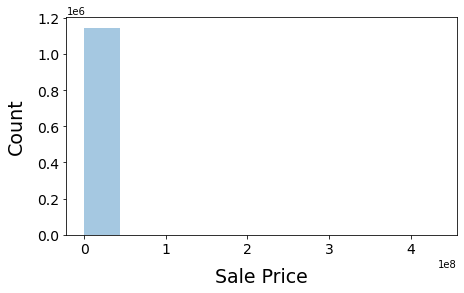

In [32]:
#looking at the distribution of the target variable : valeur_fonciere 
# or any column
def visualize_distribution_column(df, col_name, labelx): #labelx : string 
                                                  #to describe x-axis
    fig, ax = plt.subplots(figsize = (7, 4))
    sns.distplot(df[col_name], kde=False, bins=10)

    plt.xlabel(labelx, fontsize=19, labelpad=11)
    plt.xticks(fontsize=14)
    plt.ylabel('Count', fontsize=19, labelpad=11)
    plt.yticks(fontsize=14);

visualize_distribution_column(df = dfn, 
                              col_name='valeur_fonciere',labelx = 'Sale Price')



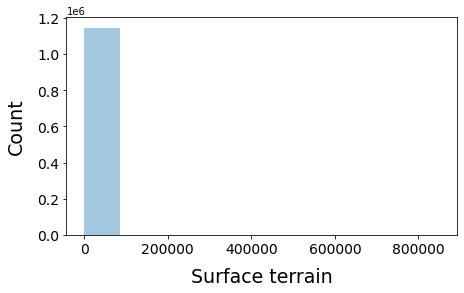

In [33]:
#looking at the distribution of the column :surface_terrain 

visualize_distribution_column(df = dfn, 
                              col_name='surface_terrain',
                              labelx = 'Surface terrain')

# Visualize the log distribution of the target variable / or other feature

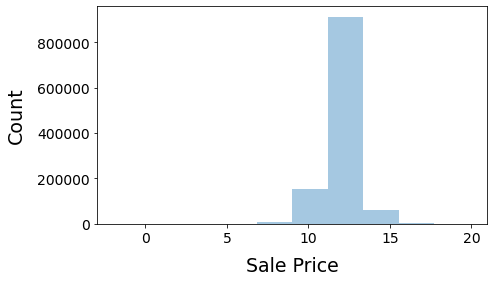

In [34]:
#looking at the log distribution of the target variable : valeur_fonciere 
# or any column
def visualize_log_distribution_column(df, col_name, labelx): #labelx : string 
                                                  #to describe x-axis
    fig, ax = plt.subplots(figsize = (7, 4))
    sns.distplot(np.log(df[col_name]), kde=False, bins=10)

    plt.xlabel(labelx, fontsize=19, labelpad=11)
    plt.xticks(fontsize=14)
    plt.ylabel('Count', fontsize=19, labelpad=11)
    plt.yticks(fontsize=14);

visualize_log_distribution_column(df = dfn, 
                              col_name='valeur_fonciere',labelx = 'Sale Price')

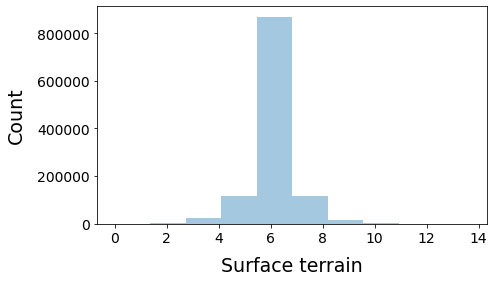

In [35]:
#looking at the log distribution of the column :surface_terrain 

visualize_log_distribution_column(df = dfn, 
                              col_name='surface_terrain',
                              labelx = 'Surface terrain')

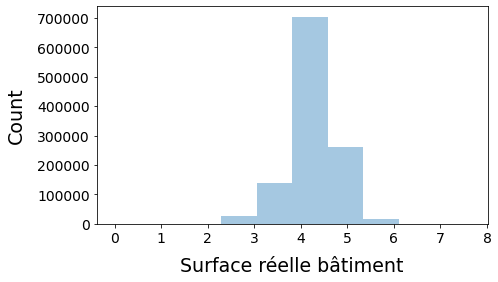

In [36]:
#looking at the log distribution of the column :surface_reelle_bati

visualize_log_distribution_column(df = dfn, 
                              col_name='surface_reelle_bati',
                              labelx = 'Surface réelle bâtiment')

# Get summary stats

In [55]:
#getting summary stats on column 

def get_summary_stats(df, col_name):
    return df[col_name].describe()

In [57]:
def get_summary_stats_log(df, col_name):
    return np.log(df[col_name]).describe()

In [56]:
#summary stats on target variable 'valeur_fonciere'
get_summary_stats(df= dfn, col_name = 'valeur_fonciere')

count    1.146255e+06
mean     4.051195e+05
std      4.120611e+06
min      1.500000e-01
25%      1.040000e+05
50%      1.730000e+05
75%      2.800000e+05
max      4.352450e+08
Name: valeur_fonciere, dtype: float64

In [58]:
res = get_summary_stats(df= dfn, col_name = 'valeur_fonciere')

In [61]:
res['min'], res['max']

(0.15, 435244992.0)

In [39]:
#summary stats on column 'surface_terrain'
get_summary_stats(df= dfn, col_name = 'surface_terrain')

count    1.146255e+06
mean     9.131281e+02
std      3.800793e+03
min      1.000000e+00
25%      4.990000e+02
50%      9.130000e+02
75%      9.130000e+02
max      8.500000e+05
Name: surface_terrain, dtype: float64

In [62]:
#summary stats on target variable 'valeur_fonciere'
res_log = get_summary_stats_log(df= dfn, col_name = 'valeur_fonciere')

In [63]:
res_log['min'], res_log['max']

(-1.8971199848858813, 19.89141963051536)

#Corelations with target column : valeur_fonciere

Correlations: Check correlation between indep variables :

*   surface_terrain, surface_reelle_bati

and
*  target variable : valeur_fonciere.



is there correlation between these variable and 'valeur_fonciere' ?

In [78]:
# Here, We use whole data df, to look at correlation between variable target and all other features

def get_correlation_features_targetVar(df, target_var):
    df_corr = df.corr()[[target_var]].sort_values(target_var, ascending=False)
    return df_corr

df_corr = get_correlation_features_targetVar(df = df, target_var = 'valeur_fonciere')
df_corr.head(5)

,valeur_fonciere
valeur_fonciere,1.000000
lot5_surface_carrez,0.503555
lot4_surface_carrez,0.384171
lot3_surface_carrez,0.375851
lot2_surface_carrez,0.275931


In [79]:
df_log = df.copy()
df_log['valeur_fonciere']= np.log(df['valeur_fonciere'])
df_log = df_log.rename(columns={"valeur_fonciere": "log(valeur_fonciere)"})
df_log.head(3)

,id_mutation,date_mutation,numero_disposition,nature_mutation,log(valeur_fonciere),adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2020-1,2020-01-07,1,Vente,8.987197,NaN,NaN,FORTUNAT,B063,1250.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1061.0,5.323540,46.171919
1,2020-2,2020-01-02,1,Vente,7.684784,NaN,NaN,TERRES DES CINQ SAULES,B124,1290.0,...,NaN,NaN,NaN,BT,taillis simples,NaN,NaN,85.0,4.893436,46.251868
2,2020-2,2020-01-02,1,Vente,7.684784,NaN,NaN,BOIS DU CHAMP RION,B006,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1115.0,4.899919,46.235327


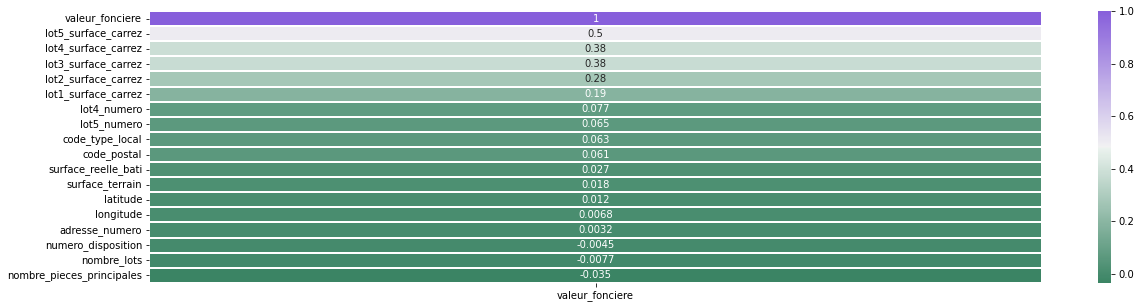

In [80]:
def plot_correlation_heatmap(df, target_var): #df : correlation dataframe
    df = df.dropna()
    fig, ax = plt.subplots(figsize = (20, 5))

    cmap = sns.diverging_palette(150, 275, as_cmap=True)
    sns.heatmap(df, annot=True, linewidths=.4, cmap=cmap, ax=ax);


plot_correlation_heatmap(df = df_corr, target_var = 'valeur_fonciere')

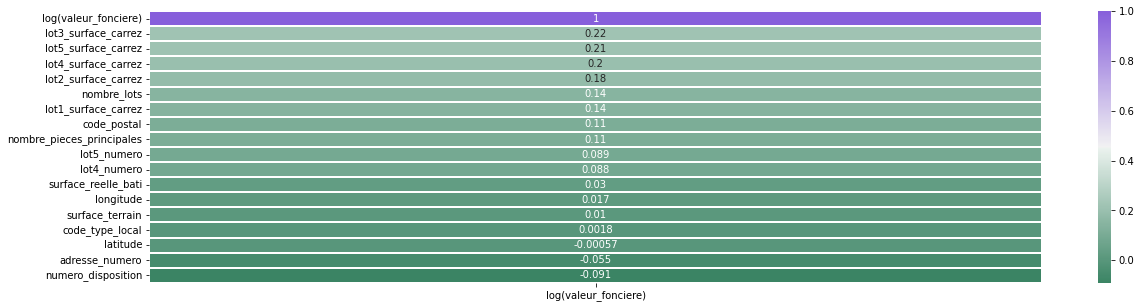

In [82]:
df_corr_log = get_correlation_features_targetVar(df = df_log, target_var = 'log(valeur_fonciere)')

plot_correlation_heatmap(df = df_corr_log, target_var = 'log(valeur_fonciere)')

# Scatterplots

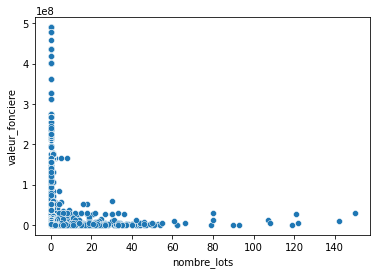

In [44]:
sns.scatterplot(x=df['nombre_lots'], y=df['valeur_fonciere']);

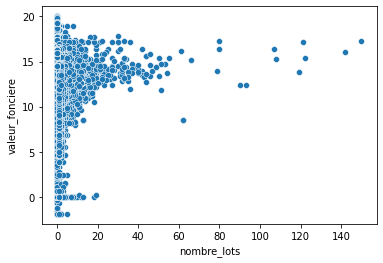

In [64]:
sns.scatterplot(x=df['nombre_lots'], y=np.log(df['valeur_fonciere']));

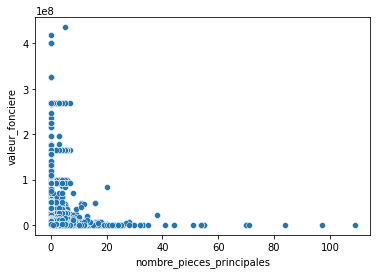

In [45]:
sns.scatterplot(x=df['nombre_pieces_principales'], y=df['valeur_fonciere']);

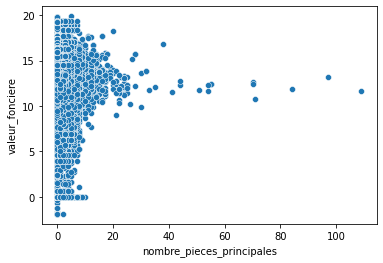

In [65]:
sns.scatterplot(x=df['nombre_pieces_principales'], y=np.log(df['valeur_fonciere']));

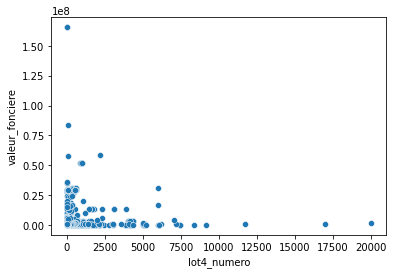

In [46]:
sns.scatterplot(x=(df['lot4_numero']).dropna(), y=df['valeur_fonciere']);

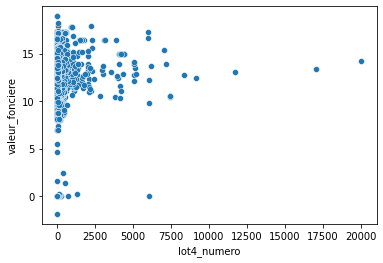

In [66]:
sns.scatterplot(x=(df['lot4_numero']).dropna(), y=np.log(df['valeur_fonciere']));

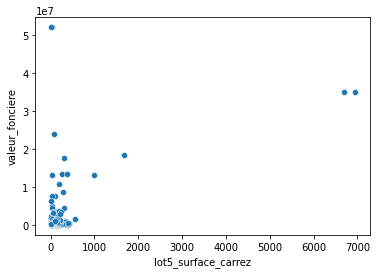

In [47]:
sns.scatterplot(x=(df['lot5_surface_carrez']).dropna(), y=df['valeur_fonciere']);

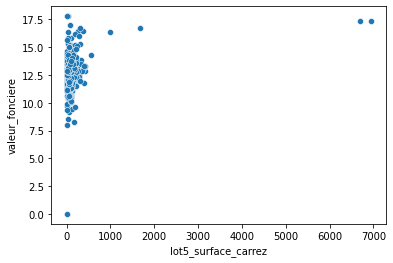

In [67]:
sns.scatterplot(x=(df['lot5_surface_carrez']).dropna(), y=np.log(df['valeur_fonciere']));

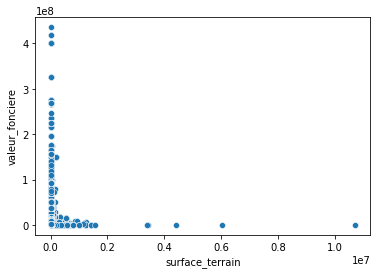

In [48]:
sns.scatterplot(x=df['surface_terrain'], y=df['valeur_fonciere']);

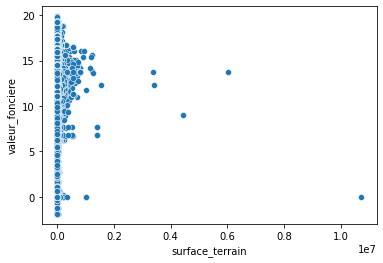

In [68]:
sns.scatterplot(x=df['surface_terrain'], y=np.log(df['valeur_fonciere']));

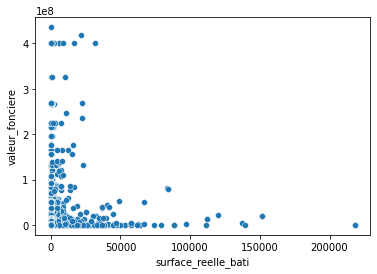

In [49]:
sns.scatterplot(x=df['surface_reelle_bati'], y=df['valeur_fonciere']);

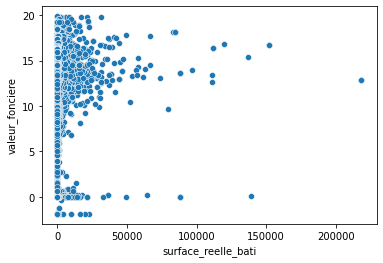

In [69]:
sns.scatterplot(x=df['surface_reelle_bati'], y=np.log(df['valeur_fonciere']));